# Principal Component Analysis

Principal Component Analysis, is a popular technique in machine learning and statistics for dimensionality reduction. It's used to simplify the complexity of high-dimensional data while retaining trends and patterns.

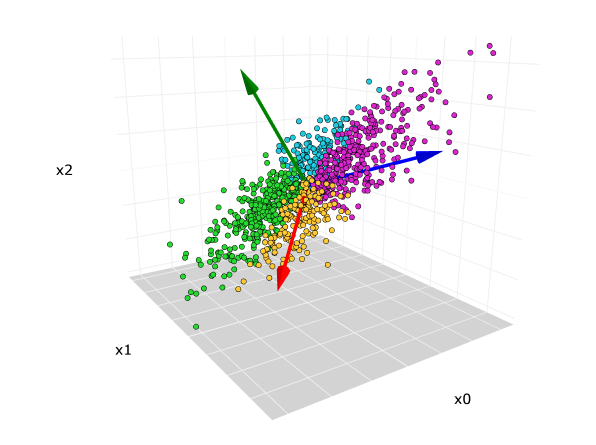

PCA is widely used in various applications, including data visualization, feature extraction, noise reduction, and speeding up learning algorithms by reducing the number of features. It's an unsupervised learning technique and doesn't rely on labeled data. However, it can be a powerful preprocessing step before supervised learning tasks.

# Why Variance is IMP in PCA? 

variance is important in PCA because it guides the selection of principal components, ensures information retention, facilitates dimensionality reduction, enhances interpretability, and improves computational efficiency. Emphasizing variance enables PCA to effectively capture and represent the essential structure of high-dimensional data in a lower-dimensional space.

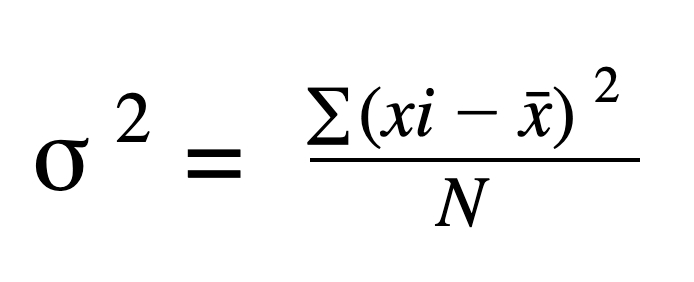

# Covariance

Covariance is a measure of the extent to which two random variables change together. In other words, it quantifies the degree to which two variables tend to move in relation to each other. If the covariance between two variables is positive, it means that when one variable increases, the other tends to increase as well. If the covariance is negative, it means that when one variable increases, the other tends to decrease.

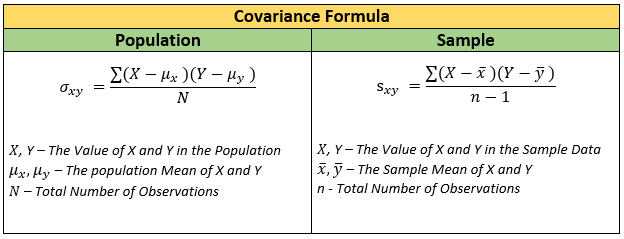

# covariance matrix

A covariance matrix is a square matrix that summarizes the covariances between multiple pairs of variables. If you have 
n variables, the covariance matrix will be an nxn matrix. The covariance matrix provides a complete picture of the variances of individual variables on the diagonal elements, and the covariances between each pair of variables in the off-diagonal elements.

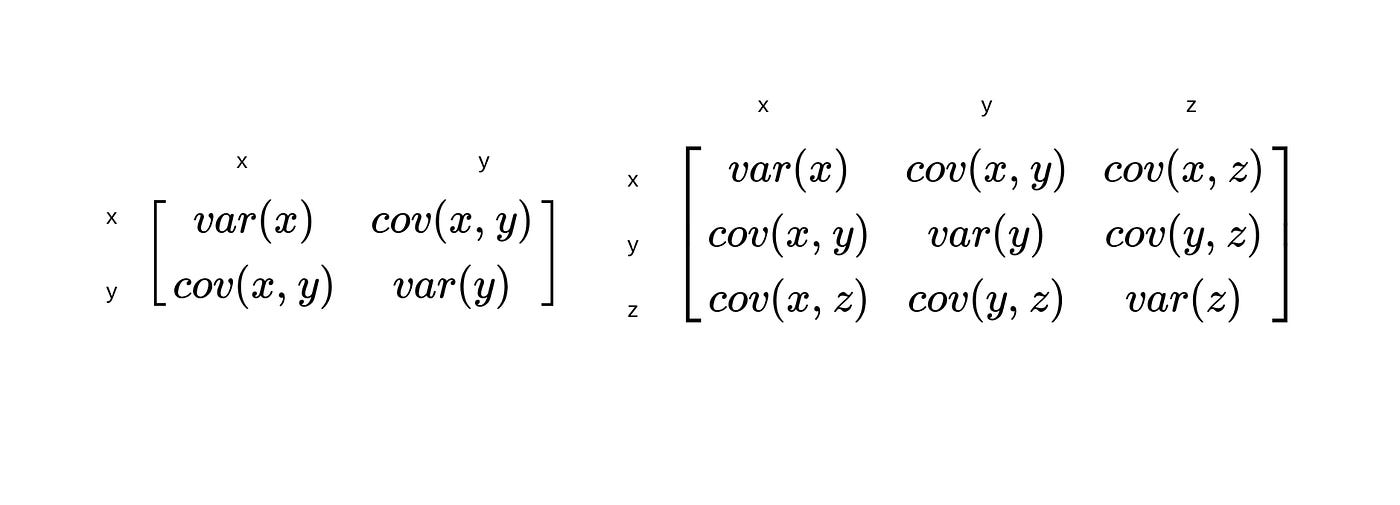

# Eigenvalues and Eigenvectors 

In simpler terms, an eigenvector of a matrix is a vector that remains in the same direction after the matrix transformation, only scaled by a factor (the eigenvalue). Eigenvectors are often associated with stable directions or patterns in the transformation represented by the matrix.

In summary, eigenvalues and eigenvectors are essential concepts in linear algebra, representing scalar factors and corresponding vectors that remain invariant under certain linear transformations described by square matrices. They have widespread applications in various fields, including data analysis, physics, engineering, and computer science.

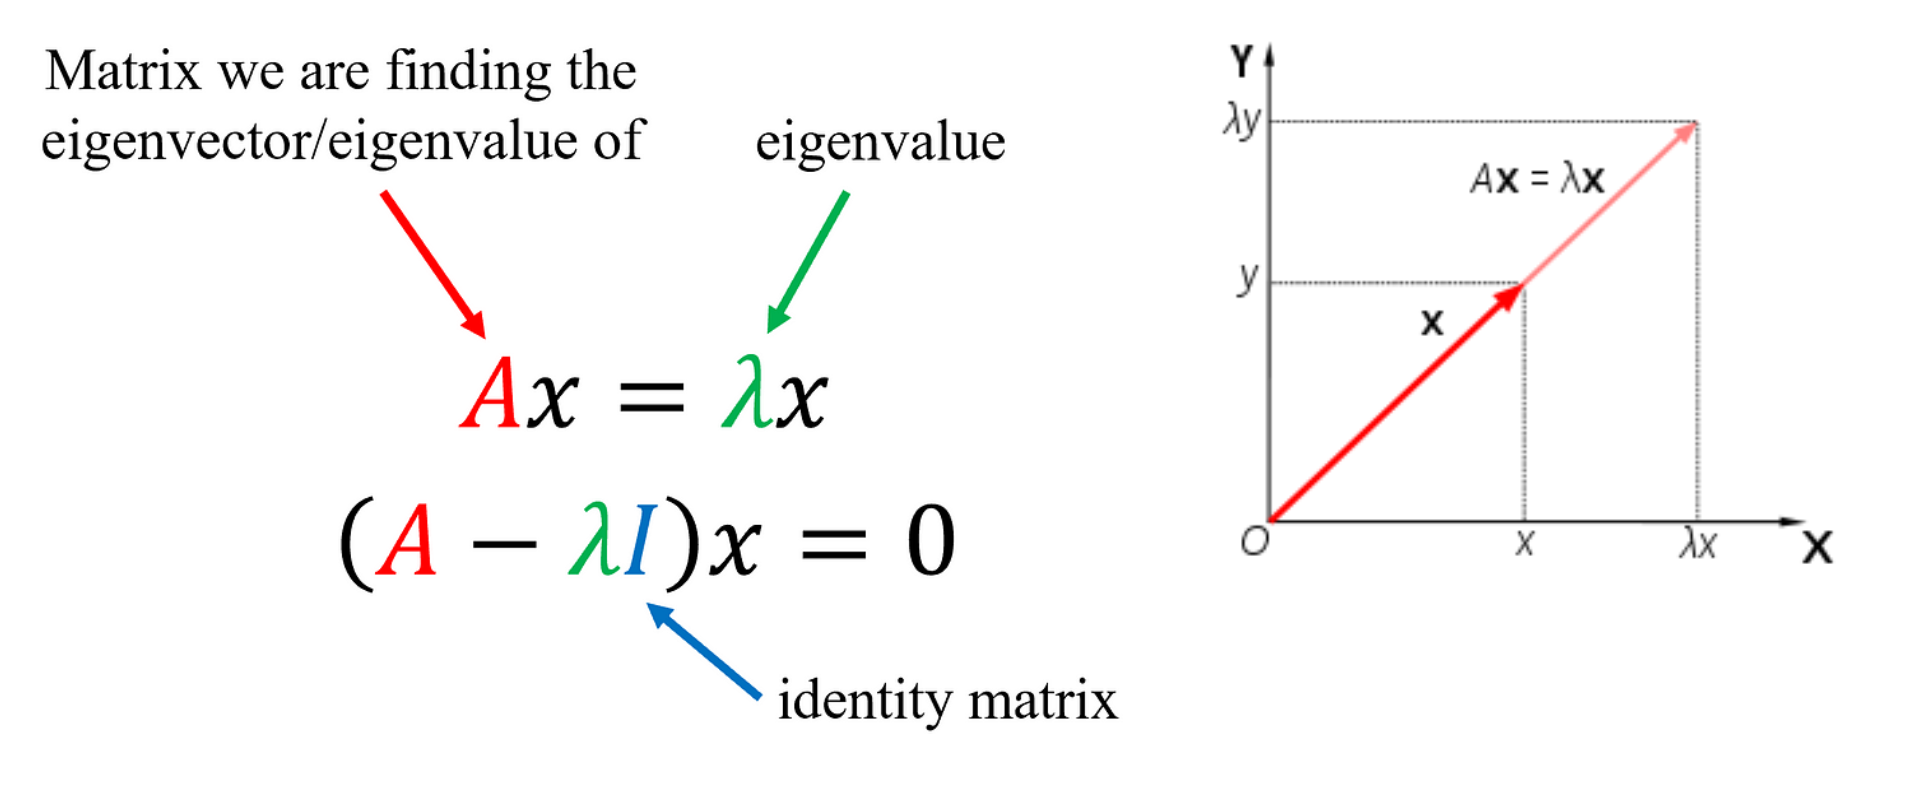

In [1]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df2 = pd.DataFrame(class2_sample, columns=['feature1','feature2','feature3'])
df2['target'] = 0

# Concatenate DataFrames using concat
df = pd.concat([df, df2], ignore_index=True)

df = df.sample(40)

df.sample(6)


feature1  feature2  feature3  target
25  0.290746  0.866975  0.982643       0
38 -0.764314  1.566504  1.548788       0
24  0.748855  2.593111  1.170818       0
15 -0.045438  1.040886 -0.094035       1
13 -0.022539  0.013422  0.935945       1
7   1.045371  0.538162  0.812119       1

In [2]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

C:\Users\Vishal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [3]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [4]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [5]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [6]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [7]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [8]:
pc = eigen_vectors[0:2]

In [9]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

PC1       PC2  target
0  0.599433  1.795862       1
1  1.056919 -0.212737       0
2 -0.271876  0.498222       1
3 -0.621586  0.023110       1
4  1.567286  1.730967       1

In [10]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     

C:\Users\Vishal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# PCA

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
wine = pd.read_csv('winequalityN.csv')

In [13]:
wine.sample(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4755  white            6.6              0.29         0.73             2.2   
984   white            6.9              0.19         0.33             1.6   
3043  white            7.2              0.21         1.00             1.1   
3888  white            6.0              0.28         0.24            17.8   
3802  white            7.9              0.21         0.39             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4755      0.027                 21.0                  92.0  0.99000  3.12   
984       0.043                 63.0                 149.0  0.99250  3.44   
3043      0.154                 46.0                 114.0  0.99310  2.95   
3888      0.047                 42.0                 111.0  0.99896  3.10   
3802      0.057                 21.0                 138.0  0.99176  3.05   

      sulphates  alcohol  quality  
4755       0.48     12.4        6  
984        0.52     10.8        5  
3043       0.43      9.2        6  
3888       0.45      8.9        6  
3802       0.52     10.9        5

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
wine.duplicated().sum()

1168

In [17]:
wine = wine.dropna()


wine.drop_duplicates(inplace=True)



In [18]:
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
wine.sample(2)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3017  white            5.9              0.34         0.30             3.8   
5278    red            8.3              0.26         0.42             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
3017      0.035                 57.0                 135.0  0.99016  3.09   
5278      0.080                 11.0                  27.0  0.99740  3.21   

      sulphates  alcohol  quality  
3017       0.34     12.0        6  
5278       0.80      9.4        6

In [20]:
X = wine.drop('type', axis=1)
y = wine['type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [23]:
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))

KNN having features - 12
Classification Accuracy without PCA: 99.34%


In [24]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [25]:
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [26]:
y_pred_pca = knn_with_pca.predict(X_test_pca)


accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 98.87%


In [27]:
accuracy_scores = []
num_pca_components = []

# Loop over different numbers of PCA components
for n in range(1, 11):
    # Apply PCA on the standardized features
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a K-Nearest Neighbors (KNN) classifier with PCA
    knn_with_pca = KNeighborsClassifier(n_neighbors=5)
    knn_with_pca.fit(X_train_pca, y_train)

    # Predict the wine type on the testing set with PCA
    y_pred_pca = knn_with_pca.predict(X_test_pca)

    # Evaluate the classification accuracy with PCA
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Append accuracy score and number of PCA components to the lists
    accuracy_scores.append(accuracy_pca)
    num_pca_components.append(n)

    print("PCA components:", n)
    print("Accuracy ", accuracy_pca * 100)

PCA components: 1
Accuracy  97.54485363550519
PCA components: 2
Accuracy  97.63928234183192
PCA components: 3
Accuracy  97.54485363550519
PCA components: 4
Accuracy  98.58356940509914
PCA components: 5
Accuracy  98.86685552407933
PCA components: 6
Accuracy  98.86685552407933
PCA components: 7
Accuracy  99.05571293673276
PCA components: 8
Accuracy  99.33899905571295
PCA components: 9
Accuracy  99.24457034938622
PCA components: 10
Accuracy  99.24457034938622


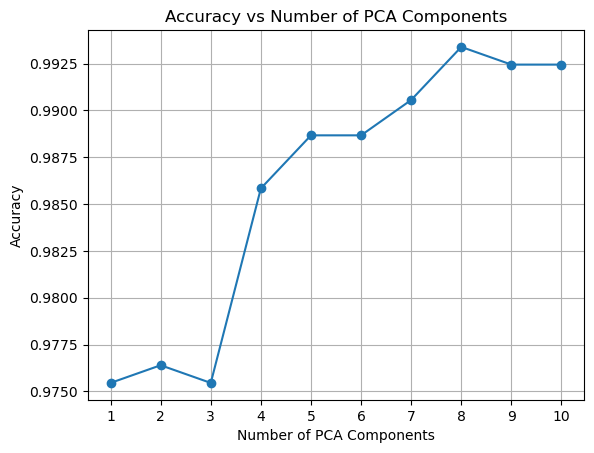

In [28]:
plt.plot(num_pca_components, accuracy_scores, marker='o')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.xticks(num_pca_components)
plt.grid(True)
plt.show()

# When to avoid PCA

Non-linearity: PCA assumes linear relationships and may not work well with non-linear data.

Unequal Importance: If features have unequal importance or scales, PCA may not capture the underlying structure accurately.

Sparsity: PCA performs poorly on sparse data where most values are zero or close to zero.

Outliers: PCA is sensitive to outliers and their influence can bias results.

Categorical Variables: PCA is designed for continuous numerical data and may not handle categorical variables well.

Small Sample Sizes: PCA requires a sufficient amount of data for reliable estimates.

Interpretability: While PCA reduces dimensionality, interpreting resulting components may not always be straightforward.